# 안녕하세요, 에이블러 여러분!
## AIVLE스쿨 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "버스 정류장 데이터" 를 확인해 보도록 하겠습니다

In [626]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터입니다.

###  데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 sklearn 라이브러리를 통해 모델을 학습시키고 저장할 때 많이 사용, 파이썬의 모든 객체를 파일로 저장할 수 있다.

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding_month_202401.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [627]:
# 아래 실습코드를 실행해주세요.

import sys
import numpy as np
import pandas as pd

In [628]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

bus_station = pd.read_csv('1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [629]:
# 데이터 프레임의 Shape을 확인합니다.

bus_station.shape

(1048575, 8)

In [630]:
bus_station2 = bus_station.copy()
bus_station2

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104
...,...,...,...,...,...,...,...,...
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129


---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보세요.

In [631]:
# head()
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [632]:
# tail()
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [633]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [634]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
bus_station.describe()


,사용일자,승차총승객수,하차총승객수,등록일자
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.024011e+07,1.030953e+02,1.010178e+02,2.024012e+07
std,7.455044e+00,1.486801e+02,1.348374e+02,7.455044e+00
min,2.024010e+07,0.000000e+00,0.000000e+00,2.024010e+07
25%,2.024011e+07,1.300000e+01,1.600000e+01,2.024011e+07
50%,2.024011e+07,5.700000e+01,6.200000e+01,2.024012e+07
75%,2.024012e+07,1.370000e+02,1.370000e+02,2.024012e+07
max,2.024013e+07,5.027000e+03,4.352000e+03,2.024013e+07


#### [실습문제3] 위 데이터에서 버스정류장 위치를 구 별로 구분 해보기

* 'bus_station' 데이터의 정보를 확인해보세요.

* 버스정류장 ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록


In [635]:
# "버스정류장ARS번호" 컬럼 확인하기
bus_station['버스정류장ARS번호']

0           6178
1          22337
2          22336
3          22334
4          22333
           ...  
1048570     1837
1048571     1831
1048572     1514
1048573     8454
1048574     1587
Name: 버스정류장ARS번호, Length: 1048575, dtype: object

In [636]:
# 버스정류장 ARS번호에서 시작하는 앞자리 2개로 '자치구'라는 새로운 컬럼 생성
# str() : 정수나 실수를 문자열 형태로 바꿔주는 함수, slice()
### 목표 : 1~25 값으로 자치구 컬럼 생성
bus_station['자치구'] = bus_station['버스정류장ARS번호']
bus_station['자치구']

0           6178
1          22337
2          22336
3          22334
4          22333
           ...  
1048570     1837
1048571     1831
1048572     1514
1048573     8454
1048574     1587
Name: 자치구, Length: 1048575, dtype: object

In [637]:
for i in range(len(bus_station['자치구'])):
    if len(bus_station['자치구'][i]) == 4:
        bus_station.loc[bus_station['자치구'].str.len() == 4, '자치구'] = '0' + bus_station['자치구']
bus_station['자치구']

0          06178
1          22337
2          22336
3          22334
4          22333
           ...  
1048570    01837
1048571    01831
1048572    01514
1048573    08454
1048574    01587
Name: 자치구, Length: 1048575, dtype: object

In [638]:
#!
bus_station['자치구'] = bus_station['자치구'].str.slice(0,2)
bus_station['자치구']

0          06
1          22
2          22
3          22
4          22
           ..
1048570    01
1048571    01
1048572    01
1048573    08
1048574    01
Name: 자치구, Length: 1048575, dtype: object

In [639]:
bus_station['자치구'].unique()

array(['06', '22', '36', '35', '13', '12', '02', '01', '42', '49', '39',
       '11', '07', '20', '47', '23', '03', '05', '40', '21', '37', '63',
       '56', '10', '57', '~', '60', '27', '48', '24', '19', '14', '15',
       '45', '46', '16', '38', '17', '18', '09', '08', '68', '0', '59',
       '61', '25', '04', '30', '28', '31', '44', '77', '41', '78'],
      dtype=object)

In [640]:
#!
### 뒤 3자리로 작업
bus_station['버스정류장ARS번호'].str.slice(-3,)

0          178
1          337
2          336
3          334
4          333
          ... 
1048570    837
1048571    831
1048572    514
1048573    454
1048574    587
Name: 버스정류장ARS번호, Length: 1048575, dtype: object

* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [641]:
# 구 코드를 구 이름으로 변환하기
# map() : 리스트, 튜플 등 반복 가능한 데이터 집합을 입력으로 받아 변환하는 함수

bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [642]:
bus_station['자치구'].unique()

array(['동대문구', '서초구', nan, '서대문구', '은평구', '중구', '종로구', '노원구', '중랑구',
       '동작구', '강남구', '용산구', '광진구', '관악구', '도봉구', '송파구', '영등포구', '마포구',
       '양천구', '강서구', '구로구', '금천구', '강북구', '성북구', '강동구', '성동구'],
      dtype=object)

In [643]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# tail(10)
bus_station['자치구'].tail(10)

1048565    종로구
1048566    종로구
1048567    종로구
1048568    종로구
1048569    종로구
1048570    종로구
1048571    종로구
1048572    종로구
1048573    성북구
1048574    종로구
Name: 자치구, dtype: object

#### [실습문제4] 결측치 처리하기



In [644]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옵니다.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인해주세요.

bus_station[ bus_station['버스정류장ARS번호']=='~' ]

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
699,20240101,441,441번(월암공영차고지~신사사거리),~,월암차고지(종점가상)(00126),0,1,20240104,NaN
1261,20240101,7021,7021번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00076),0,10,20240104,NaN
1337,20240101,7017,7017번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00090),0,10,20240104,NaN
1427,20240101,7016,7016번(은평차고지~상명대),~,은평공영차고지(가상)(00107),0,16,20240104,NaN
3332,20240101,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상)(00076),0,15,20240104,NaN
...,...,...,...,...,...,...,...,...,...
1040945,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(종점가상)(00125),0,35,20240129,NaN
1040953,20240126,271,271번(용마문화복지센터~월드컵파크7단지),~,경성여객(기점가상)(00001),61,12,20240129,NaN
1041836,20240126,N64,N64번(염곡공영차고지~강서공영차고지),~,대흥교통(기점가상)(00001),0,1,20240129,NaN
1042754,20240126,N72,N72중랑 (중랑공영차고지~은평공영차고지),~,중랑공영차고지(기점가상)(00001),3,0,20240129,NaN


In [645]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
 8   자치구         960811 non-null   object
dtypes: int64(4), object(5)
memory usage: 72.0+ MB


In [646]:
# NaN 값을 제거 해주세요.
# dropna()
bus_station.dropna(inplace=True)

In [647]:
# 컬럼별 NaN 값이 있는지 확인, info()
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  object
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int64(4), object(5)
memory usage: 73.3+ MB


In [648]:
# "버스정류장ARS번호" dtype을 정수형(int)으로 변경
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  int32 
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int32(1), int64(4), object(4)
memory usage: 69.6+ MB


#### [실습문제5] 구별로 버스정류장의 개수 확인하기 (서울시)


In [649]:
# 자치구별 버스정류장 고유값들의 갯수를 출력하여 'bus_station_count' 변수로 저장
# nunique(), groupby()
bus_station['자치구'].value_counts() # 자치구 전체 버스정류장 개수, 중복포함

강남구     56470
서초구     52099
서대문구    48563
송파구     47944
마포구     47795
은평구     45846
강서구     45796
성북구     45117
관악구     43703
영등포구    42808
노원구     42682
중랑구     41629
동작구     38216
구로구     36654
종로구     36508
양천구     36135
동대문구    35537
강북구     31614
용산구     29140
중구      27607
강동구     27469
도봉구     27365
성동구     26228
금천구     25665
광진구     22221
Name: 자치구, dtype: int64

In [650]:
bus_station_count = bus_station.groupby(by='자치구')['버스정류장ARS번호'].nunique() # 자치구별 버스정류장 고유값
bus_station_count

자치구
강남구     501
강동구     367
강북구     410
강서구     567
관악구     468
광진구     280
구로구     486
금천구     347
노원구     496
도봉구     368
동대문구    308
동작구     441
마포구     565
서대문구    460
서초구     601
성동구     433
성북구     599
송파구     470
양천구     323
영등포구    467
용산구     326
은평구     497
종로구     357
중구      174
중랑구     428
Name: 버스정류장ARS번호, dtype: int64

In [651]:
# 중랑구에 428개의 버스정류장이 있다는데, 실제 ARS번호를 확인해봅시다.

# 자치구별 버스정류장 고유값들을 출력하여 'bus_staiton_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력
bus_station[ bus_station['자치구']=='중랑구' ]['버스정류장ARS번호'].nunique()

428

In [652]:
bus_station_unique=bus_station.groupby(by='자치구')['버스정류장ARS번호'].unique()
bus_station_unique

자치구
강남구     [23850, 23109, 23110, 23108, 23111, 23442, 235...
강동구     [25101, 25102, 25104, 25105, 25106, 25165, 251...
강북구     [9237, 9146, 9187, 9186, 9188, 9189, 9190, 931...
강서구     [16150, 16149, 16148, 16147, 16146, 16145, 161...
관악구     [21082, 21072, 21118, 21028, 21001, 21002, 213...
광진구     [5182, 5181, 5002, 5001, 5004, 5003, 5298, 529...
구로구     [17228, 17227, 17226, 17225, 17210, 17209, 172...
금천구     [18114, 18113, 18112, 18111, 18777, 18776, 180...
노원구     [11152, 11156, 11155, 11154, 11153, 11151, 111...
도봉구     [10046, 10168, 10174, 10170, 10164, 10111, 101...
동대문구    [6178, 6168, 6225, 6009, 6010, 6011, 6012, 601...
동작구     [20266, 20267, 20717, 20718, 20295, 20002, 200...
마포구     [14339, 14337, 14338, 14334, 14335, 14112, 141...
서대문구    [13030, 13040, 13029, 13028, 13027, 13026, 130...
서초구     [22337, 22336, 22334, 22333, 22297, 22296, 221...
성동구     [4001, 4002, 4003, 4151, 4152, 4153, 4154, 418...
성북구     [8147, 8146, 8101, 8102, 8103, 8104, 8105, 810...
송파구     [2

In [653]:
bus_station_unique['중랑구']
# bus_station[ bus_station['자치구']=='중랑구' ]['버스정류장ARS번호'].unique() # 동일

array([7142, 7136, 7138, 7465, 7440, 7438, 7432, 7433, 7435, 7434, 7008,
       7007, 7336, 7335, 7334, 7333, 7297, 7296, 7295, 7294, 7274, 7273,
       7272, 7271, 7270, 7269, 7249, 7247, 7245, 7243, 7233, 7231, 7229,
       7227, 7225, 7223, 7222, 7221, 7220, 7219, 7218, 7217, 7216, 7199,
       7197, 7195, 7194, 7145, 7144, 7131, 7129, 7117, 7006, 7005, 7004,
       7003, 7002, 7001, 7616, 7817, 7830, 7828, 7831, 7021, 7587, 7595,
       7592, 7593, 7594, 7820, 7818, 7819, 7516, 7515, 7502, 7501, 7554,
       7553, 7500, 7499, 7498, 7496, 7494, 7821, 7829, 7832, 7043, 7045,
       7060, 7057, 7054, 7058, 7020, 7014, 7011, 7013, 7015, 7016, 7446,
       7551, 7466, 7463, 7464, 7462, 7451, 7450, 7454, 7455, 7452, 7453,
       7456, 7448, 7332, 7331, 7330, 7329, 7328, 7327, 7325, 7300, 7299,
       7298, 7250, 7248, 7246, 7244, 7242, 7232, 7230, 7228, 7226, 7224,
       7211, 7210, 7209, 7208, 7207, 7206, 7205, 7204, 7203, 7192, 7191,
       7190, 7189, 7188, 7187, 7143, 7141, 7140, 71

In [654]:
#!

In [655]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인 
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기


In [656]:
# 버스정류장ARS번호 4자리 앞 0 추가
for i in range(len(bus_station2['버스정류장ARS번호'])):
    if len(bus_station2['버스정류장ARS번호'][i]) == 4:
        bus_station2.loc[bus_station2['버스정류장ARS번호'].str.len() == 4, '버스정류장ARS번호'] = '0' + bus_station2['버스정류장ARS번호']

# 널값 제거
bus_station2.dropna(inplace=True)
bus_station2['버스정류장ARS번호']

0          06178
1          22337
2          22336
3          22334
4          22333
           ...  
1048570    01837
1048571    01831
1048572    01514
1048573    08454
1048574    01587
Name: 버스정류장ARS번호, Length: 1048575, dtype: object

In [657]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인 

# 앞 두자리 가져오기
bus_station2['버스정류장ARS번호'] = bus_station2['버스정류장ARS번호'].str.slice(0,2)
bus_station2['버스정류장ARS번호']

0          06
1          22
2          22
3          22
4          22
           ..
1048570    01
1048571    01
1048572    01
1048573    08
1048574    01
Name: 버스정류장ARS번호, Length: 1048575, dtype: object

In [658]:
bus_station2_unique = bus_station2['버스정류장ARS번호'].unique()
np.sort(bus_station2_unique)

array(['0', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '27', '28', '30', '31', '35', '36', '37',
       '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49',
       '56', '57', '59', '60', '61', '63', '68', '77', '78', '~'],
      dtype=object)

In [659]:
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기
bus_station[ bus_station['버스정류장ARS번호']==7674 ]

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
43608,20240102,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,1,20240105,중랑구
84449,20240103,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240106,중랑구
206641,20240106,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),3,0,20240109,중랑구
287124,20240108,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,2,20240111,중랑구
327856,20240109,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,4,20240112,중랑구
450342,20240112,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240115,중랑구
612051,20240116,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240119,중랑구
652849,20240117,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,0,20240120,중랑구
693641,20240118,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240121,중랑구
814818,20240121,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),2,0,20240124,중랑구


In [660]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('1.1 bus_station_202401.xlsx')
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (출처:서울열린데이터광장)
# 'only_seoul' 변수로 저장

only_seoul = pd.read_excel('1.1 bus_station_202401.xlsx')
only_seoul

,ARS_ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
11258,25995,우성아파트
11259,25996,우성아파트
11260,25997,조일약국
11261,25998,성내시장


In [661]:
# 데이터 구조 확인, info()
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS_ID  11263 non-null  int64 
 1   정류소명    11263 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.1+ KB


In [662]:
# 데이터 확인
only_seoul.describe()

,ARS_ID
count,11263.000000
mean,14334.889461
std,6975.570855
min,1001.000000
25%,8601.000000
50%,14602.000000
75%,20697.500000
max,25999.000000


In [663]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인

#! 네 차집합부분을 확인하기위해서 넣은 문제가 맞습니다 
# 때문에 서울이 아닌 Ars코드를 넣어 확인하시기만 하면됩니다!

2600 in only_seoul['ARS_ID'].unique()

False

In [664]:
# only_seoul['ARS_ID']=only_seoul['ARS_ID'].astype(object)
# only_seoul.info()

In [665]:
# for i in range(len(only_seoul['ARS_ID'])):
#     if len(only_seoul['ARS_ID'][i]) == 4:
#         only_seoul.loc[only_seoul['ARS_ID'].str.len() == 4, 'ARS_ID'] = '0' + only_seoul['ARS_ID']
# only_seoul['ARS_ID']

In [666]:
# 'ARS-ID'열 이름을 '버스정류장ARS번호'로 바꾸기
only_seoul = only_seoul.rename(columns={'ARS_ID': '버스정류장ARS번호'})
only_seoul

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
11258,25995,우성아파트
11259,25996,우성아파트
11260,25997,조일약국
11261,25998,성내시장


In [667]:
# 'only_seoul'과 'bus_station' 데이터 병합
df = pd.merge(only_seoul, bus_station, on='버스정류장ARS번호', how='inner')
df.head()

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20240101,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),3,5,20240104,종로구
1,1001,종로2가사거리,20240101,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리(00089),21,11,20240104,종로구
2,1001,종로2가사거리,20240101,470,470번(상암차고지~안골마을),종로2가사거리(00066),98,117,20240104,종로구
3,1001,종로2가사거리,20240101,741,741번(진관차고지~헌인릉입구),종로2가사거리(00075),92,116,20240104,종로구
4,1001,종로2가사거리,20240102,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리(00032),2,11,20240105,종로구


In [668]:
# 구 별로 버스 정류장의 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장
seoul_bus_station_ARS = df.groupby(by='자치구',as_index=False)[['버스정류장ARS번호']].nunique()
seoul_bus_station_ARS=seoul_bus_station_ARS.rename(columns={'버스정류장ARS번호' : '버스정류장개수'})
seoul_bus_station_ARS

,자치구,버스정류장개수
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


In [669]:
# 서울시에 있는 버스정류장 개수 구하기
#!
seoul_bus_station_ARS

,자치구,버스정류장개수
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


#### [실습문제6] 구 별로 버스 노선의 개수 확인하기

In [670]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_staion_line' 변수로 저장
seoul_bus_station_line = df.groupby(by='자치구',as_index=False)[['노선번호']].nunique()
seoul_bus_station_line

,자치구,노선번호
0,강남구,98
1,강동구,22
2,강북구,71
3,강서구,51
4,관악구,81
5,광진구,43
6,구로구,80
7,금천구,56
8,노원구,58
9,도봉구,54


#### [실습문제7] 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [671]:
# 자치구별 "승차총승객수","하차총승객수"의 합 구하기, 'seoul_bus_station_sum' 변수로 저장
# groupby()

seoul_bus_station_sum = df.groupby(by='자치구',as_index=False)[['승차총승객수','하차총승객수']].sum()
seoul_bus_station_sum.head()

,자치구,승차총승객수,하차총승객수
0,강남구,6960336,6597087
1,강동구,2515582,2460905
2,강북구,3998077,3858057
3,강서구,3981173,3963283
4,관악구,5862490,5996915


#### [실습문제8] 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [672]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

#! 값확인
seoul_bus_station_mean = df.groupby(by='자치구', as_index=False)[['승차총승객수','하차총승객수']].mean()
seoul_bus_station_mean = seoul_bus_station_mean.rename(columns={'승차총승객수' : '승차평균승객수',
                                                                '하차총승객수' : '하차평균승객수'})
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,123.257234,116.824633
1,강동구,91.578944,89.588445
2,강북구,126.465395,122.036345
3,강서구,86.932767,86.542122
4,관악구,134.946712,138.040996
5,광진구,107.491706,108.267985
6,구로구,114.700415,109.759781
7,금천구,123.088384,118.410025
8,노원구,83.356439,82.041989
9,도봉구,101.649829,98.878985


#### [실습문제9] 데이터 프레임 합치기

In [673]:
# 네 개 파일을 합쳐주세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

seoul_bus_station_ARS=seoul_bus_station_ARS.set_index('자치구')
seoul_bus_station_line=seoul_bus_station_line.set_index('자치구')
seoul_bus_station_sum=seoul_bus_station_sum.set_index('자치구')
seoul_bus_station_mean=seoul_bus_station_mean.set_index('자치구')

df_all = pd.concat([seoul_bus_station_ARS, seoul_bus_station_line,seoul_bus_station_sum, seoul_bus_station_mean], axis=1, join='inner')
df_all

,버스정류장개수,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,501,98,6960336,6597087,123.257234,116.824633
강동구,367,22,2515582,2460905,91.578944,89.588445
강북구,410,71,3998077,3858057,126.465395,122.036345
강서구,567,51,3981173,3963283,86.932767,86.542122
관악구,466,81,5862490,5996915,134.946712,138.040996
광진구,274,43,2365355,2382437,107.491706,108.267985
구로구,486,80,4204229,4023135,114.700415,109.759781
금천구,346,56,3133461,3014364,123.088384,118.410025
노원구,495,58,3553485,3497450,83.356439,82.041989


In [674]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경

df_all= df_all.rename(columns={'버스정류장개수':'정류장수', '노선번호':'노선수'})

In [675]:
# 데이터를 합친 결과를 확인합니다.
df_all

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,501,98,6960336,6597087,123.257234,116.824633
강동구,367,22,2515582,2460905,91.578944,89.588445
강북구,410,71,3998077,3858057,126.465395,122.036345
강서구,567,51,3981173,3963283,86.932767,86.542122
관악구,466,81,5862490,5996915,134.946712,138.040996
광진구,274,43,2365355,2382437,107.491706,108.267985
구로구,486,80,4204229,4023135,114.700415,109.759781
금천구,346,56,3133461,3014364,123.088384,118.410025
노원구,495,58,3553485,3497450,83.356439,82.041989


In [676]:
# 해당 데이터프레임을 csv 파일로 저장하세요.
df_all.to_csv('df_all.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [677]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

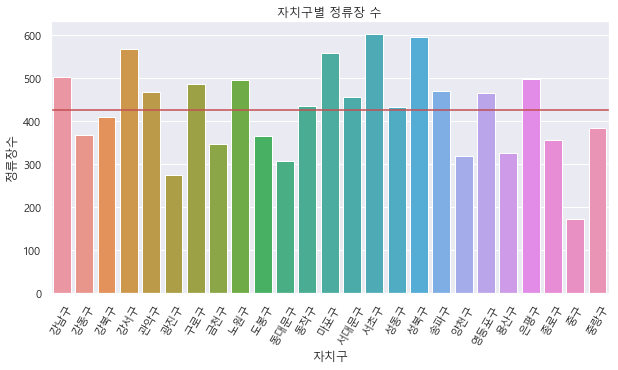

In [678]:
# 자치구별 정류장 수를 볼 수 있는 그래프를 출력해주세요.
df_all=pd.read_csv('df_all.csv')

plt.figure(figsize=(10,5))
sns.barplot(x='자치구', y='정류장수',data=df_all)
plt.axhline(df_all['정류장수'].mean(), color = 'r')

plt.xticks(rotation=60)
plt.xlabel('자치구')
plt.ylabel('정류장수')
plt.title('자치구별 정류장 수')
plt.show()




In [679]:
df_all['정류장수'].describe()

count     25.000000
mean     426.080000
std      105.022982
min      173.000000
25%      356.000000
50%      435.000000
75%      495.000000
max      601.000000
Name: 정류장수, dtype: float64

In [680]:
# import scipy.stats as spst
# df.loc[df['자치구']=='강남구', '']

In [681]:
# 위 차트를 통해 알게된 사실을 개인별로 정리해봅시다.
# 1. 정류장 수는 서초구, 성북구, 강서구 순으로 높았으며 중구가 가장 낮았다 
# 2. 정류장 수는 최소 174, 최대 601개로 분포되어있다
# 3. 정류장 평균 개수는 429개이다

## 경기도에 가까운 서울 외곽 지역일수록 버스 정류장이 많음을 알 수 있다.

---